In [11]:
# Import library yang dibutuhkan
!pip -q install torchmetrics
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import Accuracy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
# Setup random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

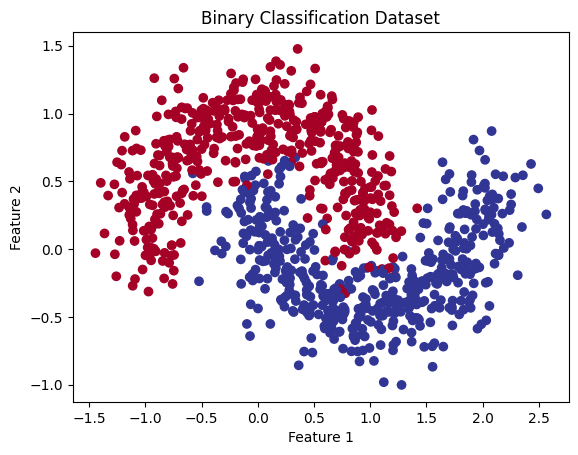

In [14]:
# Bagian 1: Membuat dataset klasifikasi binary

# Create a dataset with Scikit-Learn's make_moons()
X, y = make_moons(n_samples=1000, noise=0.2, random_state=RANDOM_SEED)

# Turn data into a DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['feature1', 'feature2', 'label'])

# Visualize the data on a scatter plot
plt.scatter(df['feature1'], df['feature2'], c=df['label'], cmap=plt.cm.RdYlBu)
plt.title("Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Turn data into tensors of dtype float
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
# Bagian 2: Membangun model klasifikasi binary

class MoonModelV0(nn.Module):
    def __init__(self):
        super(MoonModelV0, self).__init__()
        # Definisi layer-layer yang dibutuhkan, Anda dapat mengganti sesuai kebutuhan
        self.fc1 = nn.Linear(2, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass melalui layer-layer yang sudah didefinisikan
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = MoonModelV0().to(device)

In [16]:
# Bagian 3: Setup loss function dan optimizer

# Setup loss function
criterion = nn.BCELoss()

# Setup optimizer to optimize model's parameters
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
# Bagian 4: Membuat training loop

# Setup epochs
epochs = 1000

# Send data to the device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Calculate the loss
    loss = criterion(y_pred, y_train.view(-1, 1))

    # Backpropagation
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Testing
    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            # Forward pass on test set
            y_test_pred = model(X_test)

            # Calculate test loss
            test_loss = criterion(y_test_pred, y_test.view(-1, 1))

            # Calculate accuracy using TorchMetrics
            acc_fn = Accuracy(task="binary").to(device)
            accuracy = acc_fn(y_test_pred, y_test.view(-1, 1).int())


        # Print progress
        print(f"Epoch: {epoch}/{epochs} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f} | Accuracy: {accuracy.item()*100:.2f}%")

Epoch: 0/1000 | Train Loss: 0.7526 | Test Loss: 0.7468 | Accuracy: 28.00%
Epoch: 10/1000 | Train Loss: 0.7028 | Test Loss: 0.7009 | Accuracy: 42.50%
Epoch: 20/1000 | Train Loss: 0.6587 | Test Loss: 0.6602 | Accuracy: 52.50%
Epoch: 30/1000 | Train Loss: 0.6197 | Test Loss: 0.6240 | Accuracy: 58.50%
Epoch: 40/1000 | Train Loss: 0.5850 | Test Loss: 0.5918 | Accuracy: 69.00%
Epoch: 50/1000 | Train Loss: 0.5540 | Test Loss: 0.5628 | Accuracy: 70.50%
Epoch: 60/1000 | Train Loss: 0.5258 | Test Loss: 0.5363 | Accuracy: 74.50%
Epoch: 70/1000 | Train Loss: 0.5002 | Test Loss: 0.5120 | Accuracy: 77.50%
Epoch: 80/1000 | Train Loss: 0.4768 | Test Loss: 0.4895 | Accuracy: 78.00%
Epoch: 90/1000 | Train Loss: 0.4554 | Test Loss: 0.4686 | Accuracy: 78.50%
Epoch: 100/1000 | Train Loss: 0.4356 | Test Loss: 0.4492 | Accuracy: 78.50%
Epoch: 110/1000 | Train Loss: 0.4174 | Test Loss: 0.4310 | Accuracy: 78.50%
Epoch: 120/1000 | Train Loss: 0.4006 | Test Loss: 0.4140 | Accuracy: 79.50%
Epoch: 130/1000 | Train

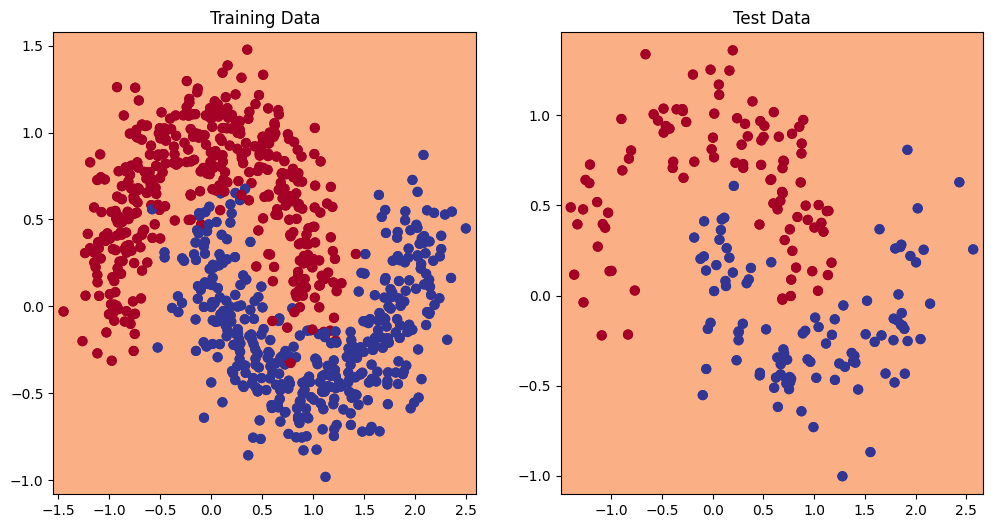

In [20]:
# Bagian 5: Membuat prediksi dengan model yang sudah dilatih

# Set model ke mode evaluasi
model.eval()

# Prediksi pada data uji
with torch.no_grad():
    y_pred = model(X_test)

# Bagian 6: Plotting hasil prediksi dengan plot_decision_boundary()

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

# Plot untuk data pelatihan
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model, X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.RdYlBu)

# Plot untuk data uji
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model, X_test, y_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.RdYlBu)

plt.show()

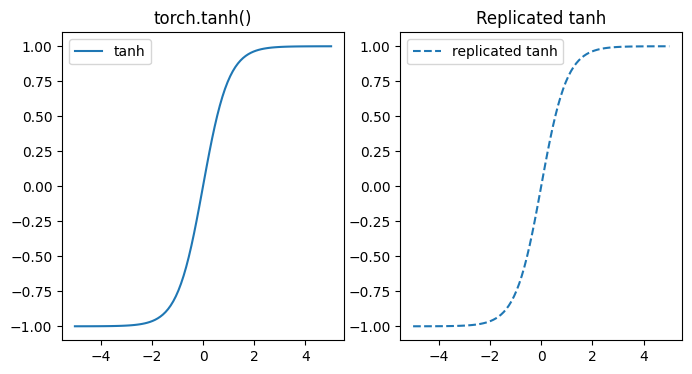

In [21]:
# Bagian 6: Replikasi fungsi aktivasi Tanh

# Buat tensor garis lurus
x_line = torch.linspace(-5, 5, 100)

# Uji torch.tanh() pada tensor dan plot hasilnya
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("torch.tanh()")
plt.plot(x_line.numpy(), torch.tanh(x_line).numpy(), label="tanh")
plt.legend()

# Replikasi torch.tanh() dan plot hasilnya
def my_tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.subplot(1, 2, 2)
plt.title("Replicated tanh")
plt.plot(x_line.numpy(), my_tanh(x_line).numpy(), label="replicated tanh", linestyle="--")
plt.legend()

plt.show()


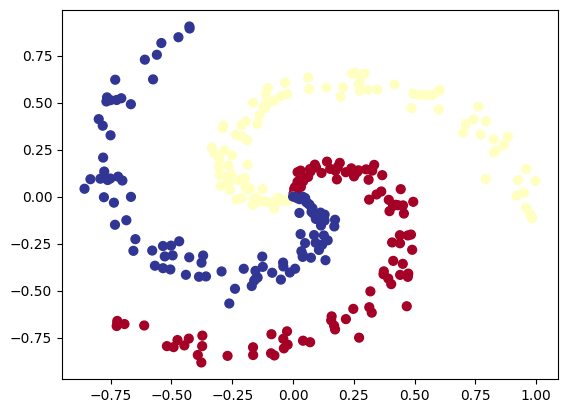

Logits:
tensor([[-0.4112,  0.1744,  0.0788],
        [-0.4076,  0.1742,  0.0768],
        [-0.4026,  0.1732,  0.0747],
        [-0.3965,  0.1715,  0.0727],
        [-0.3953,  0.1728,  0.0706],
        [-0.3907,  0.1721,  0.0685],
        [-0.3805,  0.1678,  0.0674],
        [-0.3773,  0.1685,  0.0653],
        [-0.3771,  0.1709,  0.0631],
        [-0.3672,  0.1670,  0.0620]], grad_fn=<AddmmBackward0>)
Epoch: 0 | Train loss: 1.1576 | Test loss: 1.0765
Epoch: 100 | Train loss: 0.1919 | Test loss: 0.1896
Epoch: 200 | Train loss: 0.0791 | Test loss: 0.0786
Epoch: 300 | Train loss: 0.0517 | Test loss: 0.0515
Epoch: 400 | Train loss: 0.0401 | Test loss: 0.0400
Epoch: 500 | Train loss: 0.0335 | Test loss: 0.0334
Epoch: 600 | Train loss: 0.0291 | Test loss: 0.0290
Epoch: 700 | Train loss: 0.0259 | Test loss: 0.0259
Epoch: 800 | Train loss: 0.0236 | Test loss: 0.0235
Epoch: 900 | Train loss: 0.0217 | Test loss: 0.0217


In [23]:
# Bagian 7: Membuat dataset multi-kelas dan melatih model

# Kode untuk membuat dataset spiral dari CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100  # jumlah titik per kelas
D = 2  # dimensionalitas
K = 3  # jumlah kelas
X_spiral = np.zeros((N * K, D))  # matriks data (setiap baris = satu contoh)
y_spiral = np.zeros(N * K, dtype='uint8')  # label kelas
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X_spiral[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y_spiral[ix] = j

# Visualisasikan data pada plot scatter
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=40, cmap=plt.cm.RdYlBu)
plt.show()

# Ubah data menjadi tensor
X_spiral = torch.from_numpy(X_spiral).type(torch.float)  # fitur sebagai float32
y_spiral = torch.from_numpy(y_spiral).type(torch.LongTensor)  # label harus berupa tipe long

# Bagian 7.1: Persiapkan kode agnostik perangkat
device = "cuda" if torch.cuda.is_available() else "cpu"

# Bagian 7.2: Buat model dengan subclassing nn.Module
class SpiralModel(nn.Module):
    def __init__(self):
        super(SpiralModel, self).__init__()
        self.fc1 = nn.Linear(2, 100)  # layer linear pertama
        self.relu = nn.ReLU()  # fungsi aktivasi ReLU
        self.fc2 = nn.Linear(100, 3)  # layer linear kedua (3 kelas)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Bagian 7.3: Instansiasi model dan kirim ke perangkat
model_spiral = SpiralModel()
model_spiral.to(device)

# Bagian 7.4: Setup data untuk kode agnostik perangkat
X_spiral, y_spiral = X_spiral.to(device), y_spiral.to(device)

# Bagian 7.5: Print 10 keluaran model yang belum dilatih (forward pass)
print("Logits:")
print(model_spiral(X_spiral[:10]))

# Bagian 7.6: Setup fungsi dan optimizer kehilangan
loss_fn_spiral = nn.CrossEntropyLoss()  # fungsi kehilangan cross entropy
optimizer_spiral = torch.optim.Adam(model_spiral.parameters(), lr=0.01)  # optimizer Adam

# Bagian 7.7: Bangun loop pelatihan untuk model
epochs_spiral = 1000
for epoch in range(epochs_spiral):
    ### Pelatihan
    model_spiral.train()  # mode pelatihan
    optimizer_spiral.zero_grad()  # nolkan gradien
    y_logits_spiral = model_spiral(X_spiral)  # langkah maju
    loss_spiral = loss_fn_spiral(y_logits_spiral, y_spiral)  # hitung kehilangan
    loss_spiral.backward()  # langkah mundur (backpropagation)
    optimizer_spiral.step()  # langkah optimizer (gradien descent)

    ### Pengujian
    model_spiral.eval()  # mode evaluasi
    with torch.no_grad():
        y_logits_spiral_test = model_spiral(X_spiral)
        loss_spiral_test = loss_fn_spiral(y_logits_spiral_test, y_spiral)

    # Cetak keluaran setiap 100 epoch
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss_spiral.item():.4f} | Test loss: {loss_spiral_test.item():.4f}")
